In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Introduction**
**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**

## **Reading and Understanding the data**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Shape of the dataset
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 201 missing values in the data.


In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
# Checking for duplicate records
df.duplicated().sum()

0

In [14]:
# 5 Point summary of the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Exploratory Data Analysis**

### **Data Cleaning**

In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
# Create seperate list of categorical and numerical variables
categorical_features = df.select_dtypes(include='object').columns.to_list()
numerical_features = df.select_dtypes(include='number').columns.to_list()

In [17]:
numerical_features.remove('stroke')
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [18]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
# Checking datatype of features
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**The datatype of features are correct.**

In [21]:
# Lets check the quality of the data by checking the uniique categories of the daat in each feature
for col in categorical_features:
    print(col,": {} Number of Unique categories ".format(df[col].nunique()))
    print(df[col].unique())
    print("="*50)

gender : 3 Number of Unique categories 
['Male' 'Female' 'Other']
ever_married : 2 Number of Unique categories 
['Yes' 'No']
work_type : 5 Number of Unique categories 
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : 2 Number of Unique categories 
['Urban' 'Rural']
smoking_status : 4 Number of Unique categories 
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


###### **1. There is unknown category in smoking status.**
###### **2. Explore 'children' category in work_type.**

In [22]:
# Check how many records with 'unknown' category
df[df['smoking_status']=='Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5098,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


### **Univariate Analysis**

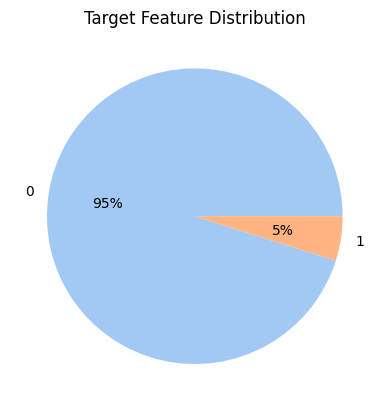

In [23]:
# Target variable distribution
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['stroke'].value_counts(), labels = df['stroke'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title('Target Feature Distribution')
plt.show()

***The data is highly imbalanced. We need to use data imbalance techniques to handle the imbalance.***

In [24]:
len(categorical_features)

5

In [25]:
# Lets explore distribution of categories in features.
def categorical_analysis(dataframe:pd.DataFrame(),cat_features:list,
                         rows:int,columns:int,target_feature:pd.Series()= None,fig_width: int = 20, fig_height: int = 10):

    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(cat_features):
        plt.subplot(rows,columns,i+1)
        sns.countplot(data=dataframe,x=col,hue=target_feature)
        plt.title("{} Distribution".format(col))
    plt.show()

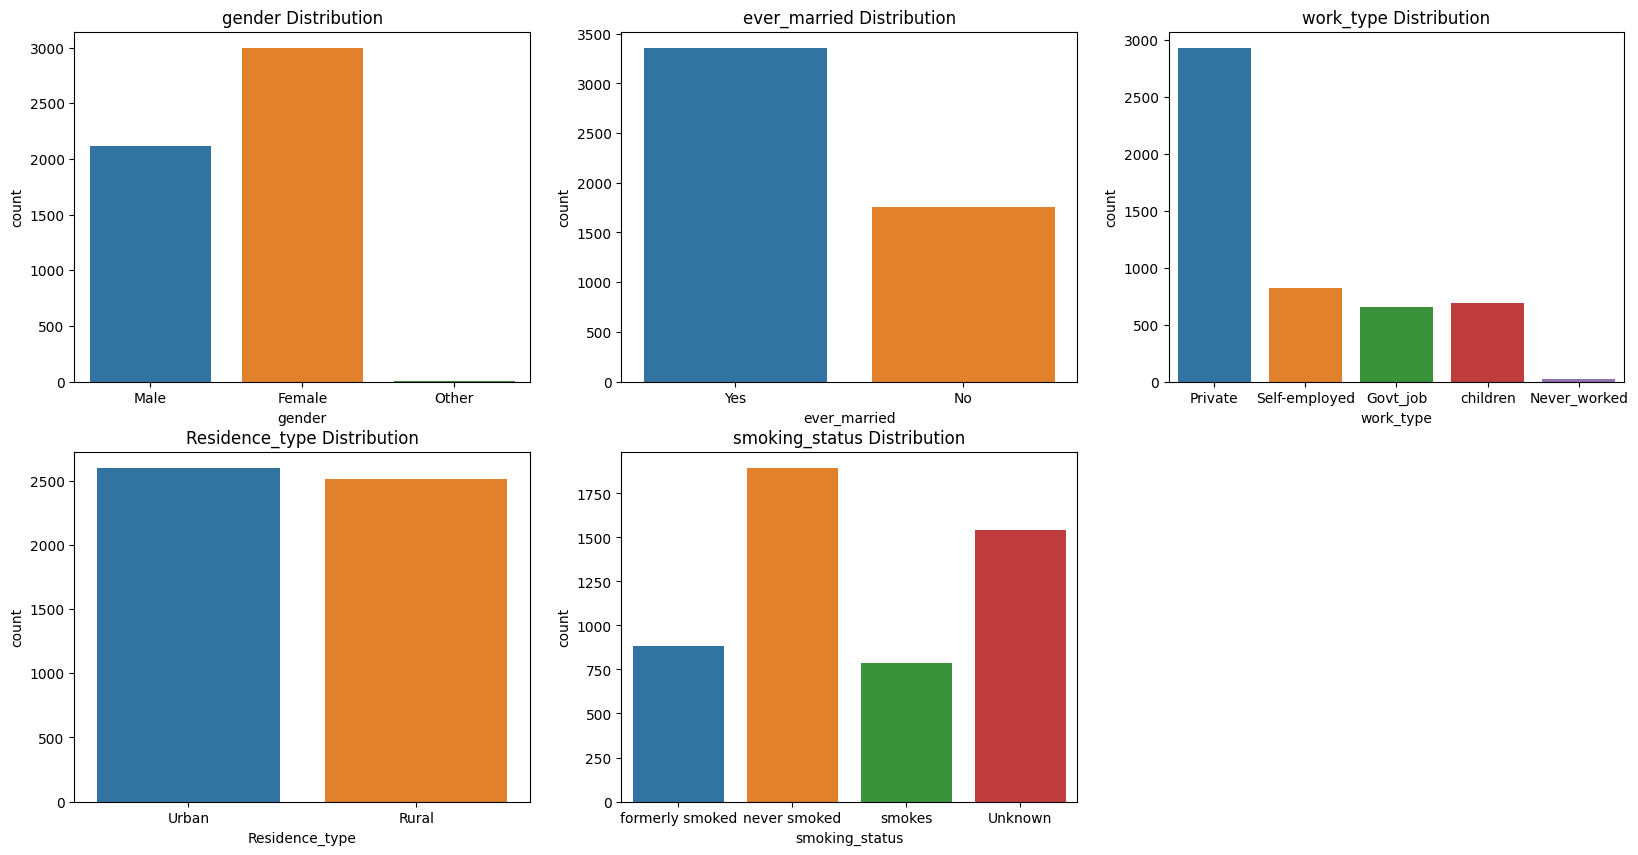

In [26]:
categorical_analysis(df,categorical_features,2,3)

***1. Never worked category has very few values. Lets check the total percentage values and drop those.***

In [27]:
df['work_type'].value_counts(normalize=True)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

In [28]:
# Dropping the never worked category records
df = df[df['work_type']!= 'Never_worked']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [29]:
df['work_type'].value_counts(normalize=True)

Private          0.574882
Self-employed    0.160967
children         0.135024
Govt_job         0.129127
Name: work_type, dtype: float64

In [30]:
# Lets explore distribution of categories in features.
def numerical_analysis(dataframe:pd.DataFrame(),num_features:list,
                         rows:int,columns:int,target_feature:pd.Series()= None,fig_width: int = 20, fig_height: int = 10):

    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(num_features):
        plt.subplot(rows,columns,i+1)
        if target_feature is not None:
            sns.kdeplot(data=dataframe,x=col,hue=target_feature)
        else:
            sns.histplot(data=dataframe,x=col,kde=True,hue=target_feature)
        plt.title("{} Distribution".format(col))
    plt.show()

In [31]:
len(numerical_features)

5

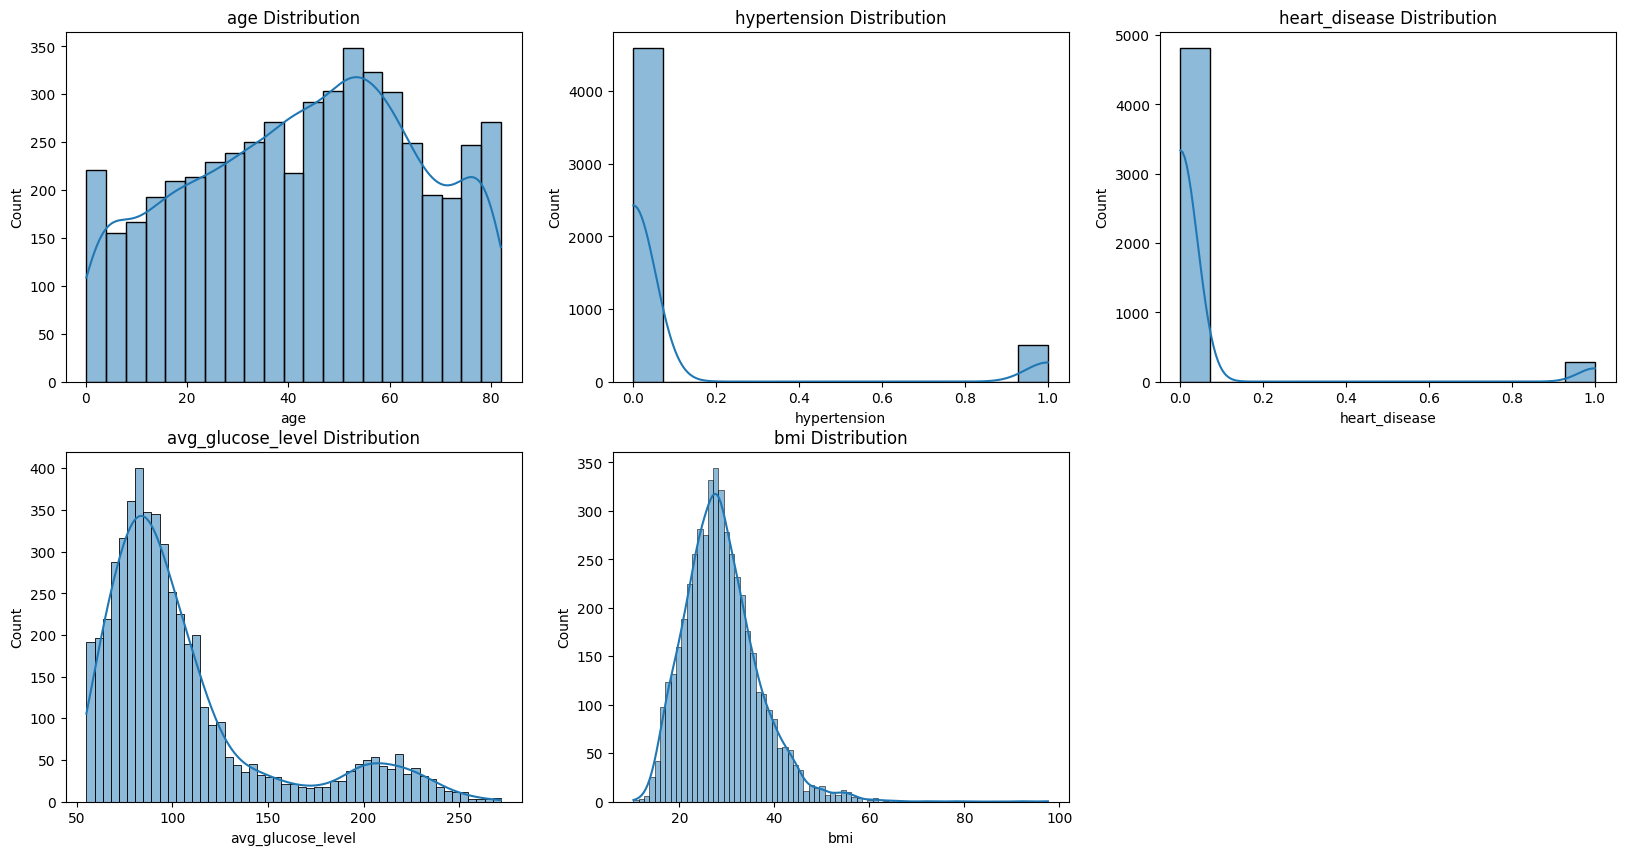

In [32]:
numerical_analysis(df,numerical_features,2,3)

### **Bivariate Analysis**

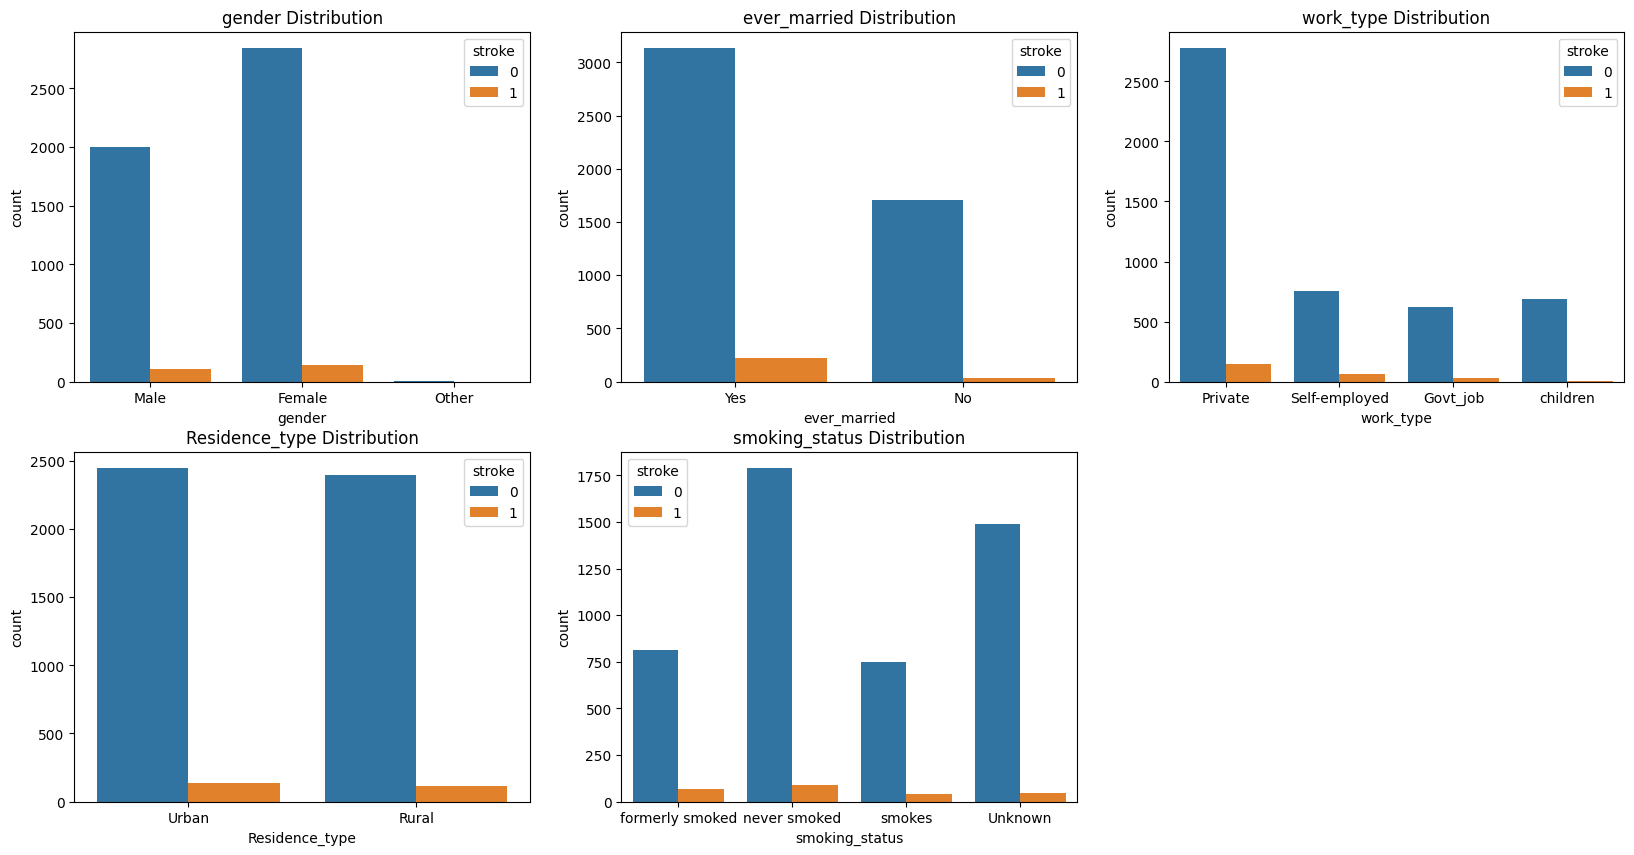

In [33]:
categorical_analysis(df,categorical_features,2,3,'stroke')

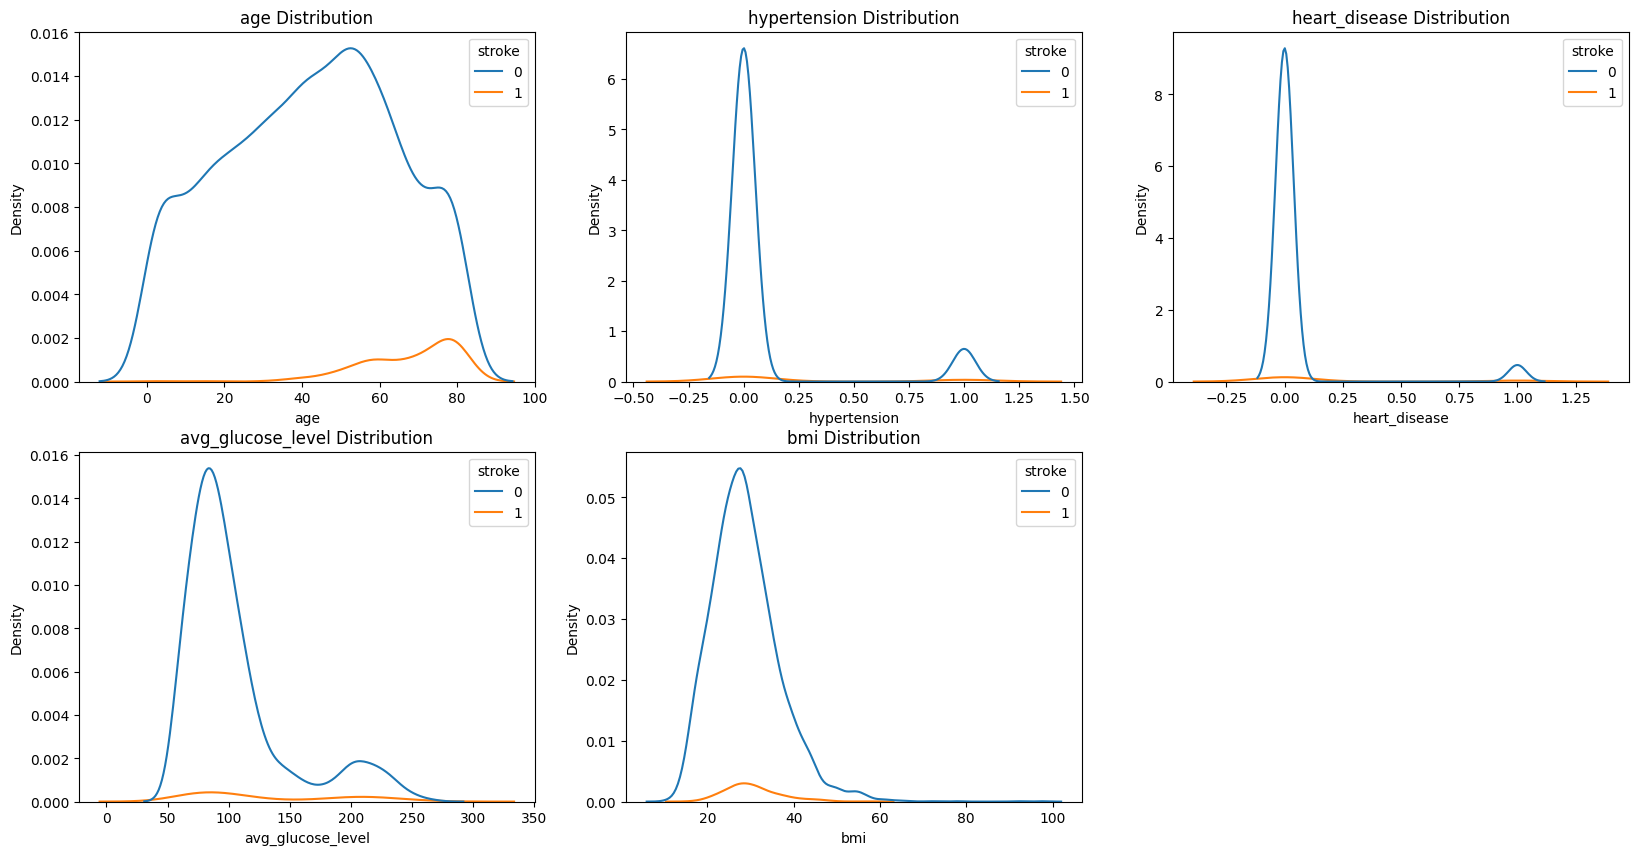

In [34]:
numerical_analysis(df,numerical_features,2,3,'stroke')

### **Multivariate Analysis**

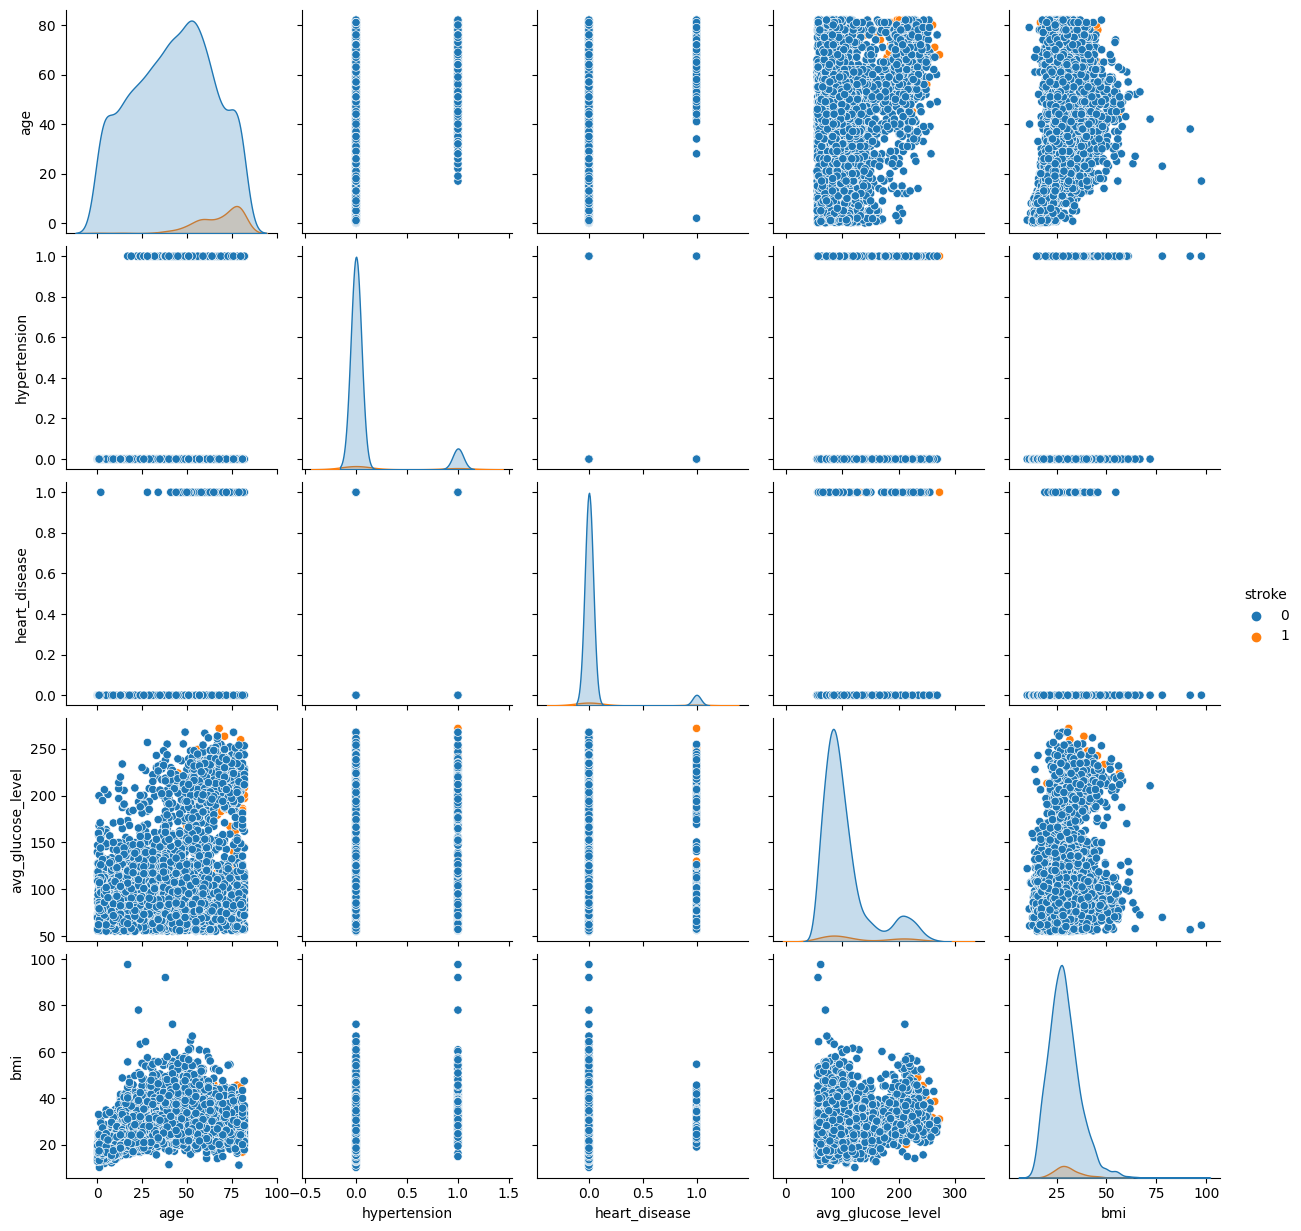

In [35]:
sns.pairplot(df,hue='stroke')
plt.show()

## **Model Building**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [37]:
# Splitting data into X,y
X = df.drop('stroke',axis=1)
y = df['stroke']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print('X_train shape :', X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (3561, 10)
y_train shape : (3561,)
X_test shape : (1527, 10)
y_test shape : (1527,)


**Building categorical and numerical pipepline**

In [39]:
print("categorical_features:",categorical_features)
print('numerical_features:',numerical_features)

categorical_features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [40]:
num_pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

In [41]:
cat_pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ("OHE",OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
preprocessor = ColumnTransformer([
    ('Numerical Transformation',num_pipeline,numerical_features),
    ('Categorical Transformation',cat_pipeline,categorical_features)
])

In [43]:
# Apply SMOTE to balance the dataset
resampling = SMOTE(sampling_strategy='auto', random_state=42)

In [44]:
log_reg = LogisticRegression()

In [45]:
from imblearn.pipeline import Pipeline as ImbPipeline
pipeline = ImbPipeline([
    ('Preprocessor',preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)), # SMOTE for oversampling minority classes
    ('Logistic Regression',log_reg)
])

In [46]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Transformation',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('Categorical Transformation',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('Logistic Regression', LogisticRegression())])

In [47]:
# Training accuracy
y_train_pred = pipeline.predict(X_train)
roc_auc_score(y_train,y_train_pred)

0.7730816330802723

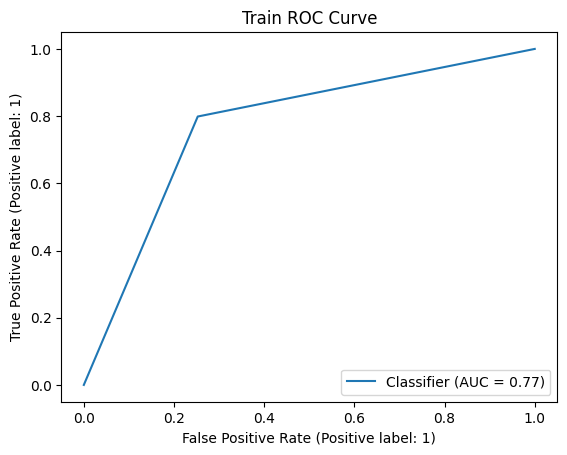

In [48]:
# Training
RocCurveDisplay.from_predictions(y_train,y_train_pred)
plt.title("Train ROC Curve")
plt.show()

In [49]:
# Test accuracy
y_test_pred = pipeline.predict(X_test)
roc_auc_score(y_test,y_test_pred)

0.7742225293711127

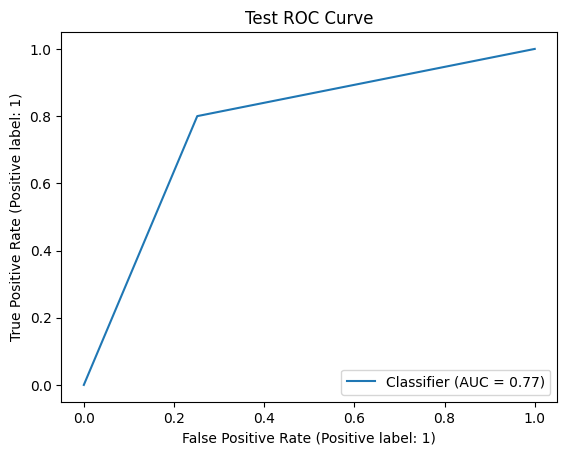

In [50]:
# Testing
RocCurveDisplay.from_predictions(y_test,y_test_pred)
plt.title("Test ROC Curve")
plt.show()